# 23:00 UTC Artifact

Several meteorological variables in the 5-minute dataset exhibit an artifact causing all twelve values in each daily 23:00–23:55 block (UTC) to be identical.

In [1]:
import pvlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Fetch an example 5-minute dataset and show that the values from 23:00 to 23:55 are all the same:

In [2]:
df, _ = pvlib.iotools.get_psm3(latitude=40, longitude=-100,
                               names='2020', interval=5,
                               api_key='DEMO_KEY', email='assessingsolar@gmail.com',
                               map_variables=True, leap_day=True)
df = df.tz_convert('UTC')

In [3]:
# a single day
columns = ['temp_air', 'wind_speed', 'wind_direction', 'pressure']
df[columns].loc['2020-06-01 22:45':'2020-06-02 00:15']

,temp_air,wind_speed,wind_direction,pressure
2020-06-01 22:45:00+00:00,33.9,5.5,174.0,930.0
2020-06-01 22:50:00+00:00,33.8,5.5,174.0,930.0
2020-06-01 22:55:00+00:00,33.6,5.4,173.0,930.0
2020-06-01 23:00:00+00:00,33.5,5.4,172.0,930.0
2020-06-01 23:05:00+00:00,33.5,5.4,172.0,930.0
2020-06-01 23:10:00+00:00,33.5,5.4,172.0,930.0
2020-06-01 23:15:00+00:00,33.5,5.4,172.0,930.0
2020-06-01 23:20:00+00:00,33.5,5.4,172.0,930.0
2020-06-01 23:25:00+00:00,33.5,5.4,172.0,930.0
2020-06-01 23:30:00+00:00,33.5,5.4,172.0,930.0


Note that the repeated value is different for each day; it seems like the value for 23:00 is legitimate but copied into the subsequent eleven timestamps.  This is a little plainer when plotting several days:

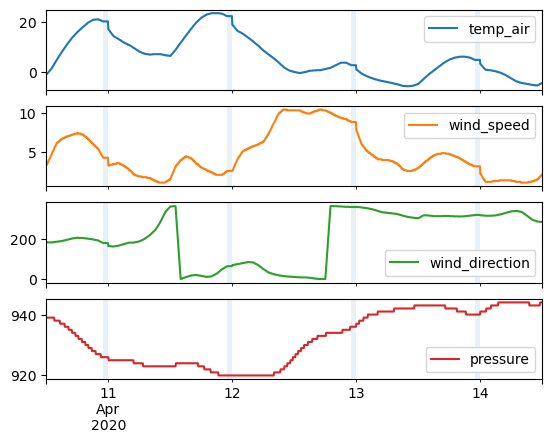

In [4]:
subset = df.loc['2020-04-10 12:00':'2020-04-14 12:00']
axes = subset[columns].plot(subplots=True)
# highlight the 23:00 hour each day
for dt in np.unique(pd.to_datetime(subset.index.date)):
    st = dt + pd.Timedelta(hours=23)
    ed = st + pd.Timedelta(minutes=55)
    for ax in axes:
        ax.axvspan(st, ed, alpha=0.1)

The artifact is most obvious considering the year as a whole, so let's show that it affects every day in the dataset.  One way to do this is to show that the interval-by-interval changes are all zeros in the 23:00 hour (white band at top of each figure) with large changes at 0:00:

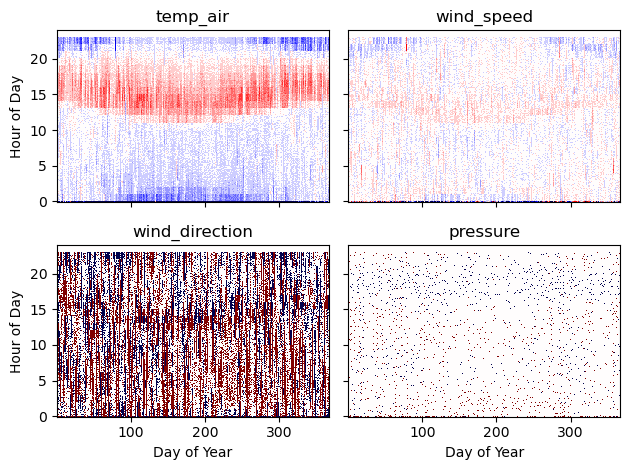

In [5]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for column, ax in zip(columns, np.ravel(axes)):
    pivot = pd.DataFrame({
        'time of day': df.index.hour + df.index.minute/60,
        'day of year': df.index.dayofyear,
        'change': df[column].diff(),
    }).pivot(index='time of day',
             columns='day of year',
             values='change')

    ax.pcolormesh(pivot.columns, pivot.index, pivot, shading='auto', vmin=-1, vmax=1, cmap='seismic')
    ax.set_title(column)

for i in range(2):
    axes[i, 0].set_ylabel('Hour of Day')
    axes[-1, i].set_xlabel('Day of Year')

fig.tight_layout()

In [6]:
%load_ext watermark
%watermark --iversions -u -d -t

Last updated: 2022-12-29 21:23:59

pandas    : 1.5.0
matplotlib: 3.5.2
numpy     : 1.22.3
pvlib     : 0.9.3

